In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

import numpy as np
from PIL import Image

In [6]:
my_image = Image.open('./data/image_true_train.jpg').convert('RGB')
my_image_2 = Image.open('./data/image_false_train.jpg').convert('RGB')

In [7]:
my_image = my_image.resize((50, 50), Image.ANTIALIAS)
my_image_2 = my_image_2.resize((50, 50), Image.ANTIALIAS)

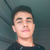

In [8]:
my_image

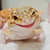

In [9]:
my_image_2

In [10]:
my_image_array = img_to_array(my_image)
my_image_2_array = img_to_array(my_image_2)

In [11]:
datagen = ImageDataGenerator(
    rotation_range=50,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
)
samples = np.expand_dims(my_image_array, 0)
data_it = datagen.flow(samples)

In [12]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=50,
    height_shift_range=50,
    zoom_range=50,
    channel_shift_range=200,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
)

samples_2 = np.expand_dims(my_image_2_array, 0)
data_it_2 = datagen.flow(samples_2)

In [13]:
dataset_x = []
dataset_y = []

for i in range(100):
    dataset_x.append(data_it.next().reshape(50, 50, -1))
    dataset_y.append(1)
    dataset_x.append(data_it_2.next().reshape(50, 50, -1))
    dataset_y.append(0)

In [14]:
dataset_x = np.asarray(dataset_x)
dataset_y = np.asarray(dataset_y)

In [15]:
dataset_x = dataset_x / 255.

In [16]:
model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dropout (Dropout)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(dataset_x, dataset_y, epochs=20)

Epoch 1/20
7/7 [==============================] - 2s 115ms/step - loss: 0.8552 - accuracy: 0.6700
Epoch 2/20
7/7 [==============================] - 1s 112ms/step - loss: 0.1678 - accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 1s 111ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 1s 114ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 1s 114ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 1s 120ms/step - loss: 6.1734e-04 - accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 1s 114ms/step - loss: 2.9327e-04 - accuracy: 1.0000
Epoch 8/20
7/7 [==============================] - 1s 114ms/step - loss: 2.1883e-04 - accuracy: 1.0000
Epoch 9/20
7/7 [==============================] - 1s 114ms/step - loss: 1.1806e-04 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 1s 113ms/step - loss: 9.4115e-05 - accuracy: 1.0000

In [51]:
image_true = Image.open('./data/image_true_test.jpg').convert('RGB')
image_false =  Image.open('./data/image_false_test.jpg').convert('RGB')

image_true = image_true.resize((50, 50), Image.ANTIALIAS)
image_false = image_false.resize((50, 50), Image.ANTIALIAS)

image_true_array = img_to_array(image_true)
image_false_array = img_to_array(image_false)

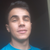

In [52]:
image_true

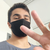

In [53]:
image_false

In [54]:
def is_it_me(image):

    if type(image) == np.ndarray:
        x = model.predict(np.array([image])[0:1])
    else:
        img = image.resize((50, 50), Image.ANTIALIAS)
        img_array = np.array([img_to_array(img)])[0:1]

        x = model.predict(img_array)

    if x[0] == 1:
        x = 'yes'
    else:
        x = 'no'

    print('Is it me? \nPrediction: ' + x)

In [58]:
is_it_me(image_true)

Is it me? 
Prediction: yes


In [27]:
model.save('./saves/trained_model_me')

INFO:tensorflow:Assets written to: ./saves/trained_model_me\assets


In [30]:
model = load_model('./saves/trained_model_me')